In [3]:
import matplotlib.pyplot as plt
from keras.datasets import mnist

## Load MNIST Dataset

In [2]:
(X_train,y_train), (X_test,y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [4]:
X_train.shape

(60000, 28, 28)

### Show First Image

In [14]:
single_img = X_train[0,:,:,]

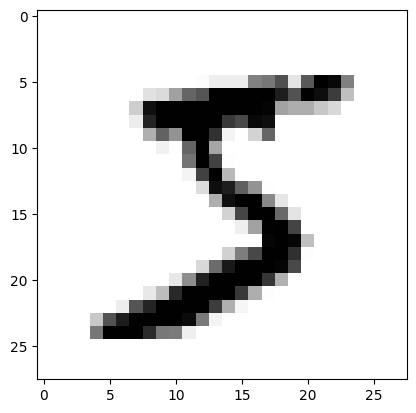

In [18]:
plt.imshow(single_img, cmap="gray_r")

In [21]:
y_train.shape

(60000,)

## One Hot Encoding

In [22]:
from keras.utils.np_utils import to_categorical

In [25]:
y_cat_train = to_categorical(y_train, 10)
y_cat_test =  to_categorical(y_test, 10)

In [26]:
y_cat_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [27]:
y_cat_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)